# Notebook for CRN1

This notebook can be used to generate data on the birth-death chemical reaction : $ø \xrightarrow{c} S$.

In [1]:
import sys
sys.path.append('../')
import numpy as np
import torch
import matplotlib.pyplot as plt
import neuralnetwork
import convert_csv
import generate_data
import simulation
import get_sensitivities
import seaborn
import pandas as pd
from scipy.stats import poisson
import math
import ode
from typing import Tuple, Callable
from CRN1_pure_birth import propensities

## Import data

In [3]:
FILE_NAME = 'CRN1_pure_birth/data'
CRN_NAME = 'pure_birth'
NUM_PARAMS = 1

In [4]:
# loading data
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train1.csv')
X_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train2.csv')
X_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train3.csv')
y_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train1.csv')
y_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train2.csv')
y_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train3.csv')
X_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid1.csv')
X_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid2.csv')
X_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid3.csv')
y_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid1.csv')
y_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid2.csv')
y_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid3.csv')
X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data1 = [X_train1, y_train1]
valid_data1 = [X_valid1, y_valid1]
train_data2 = [X_train2, y_train2]
valid_data2 = [X_valid2, y_valid2]
train_data3 = [X_train3, y_train3]
valid_data3 = [X_valid3, y_valid3]

## Choosing number of components - Elbow method

We use the elbow method to choose the appropriate number of components.

Neural Network created.


Training ...:  62%|██████▏   | 311/500 [01:01<00:37,  5.05it/s]


Learning rate: 0.0003125,
Train loss: 23.75750160217285,
 Valid loss: 23.887231826782227
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [01:35<00:00,  5.23it/s]


Learning rate: 0.0025,
Train loss: 0.0031069896649569273,
 Valid loss: 0.0032010513823479414
Neural Network created.


Training ...:  62%|██████▏   | 311/500 [00:53<00:32,  5.82it/s]


Learning rate: 0.0003125,
Train loss: 23.75750160217285,
 Valid loss: 23.887231826782227
Computed loss with 1 components.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [01:52<00:00,  4.45it/s]


Learning rate: 0.0025,
Train loss: 0.003192656673491001,
 Valid loss: 0.0032918700017035007
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [01:48<00:00,  4.60it/s]


Learning rate: 0.0025,
Train loss: 0.0034853885881602764,
 Valid loss: 0.0035986704751849174
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [01:51<00:00,  4.46it/s]


Learning rate: 0.0025,
Train loss: 0.0031953942961990833,
 Valid loss: 0.003290961030870676
Computed loss with 2 components.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:13<00:00,  3.73it/s]


Learning rate: 0.0025,
Train loss: 0.003215255681425333,
 Valid loss: 0.0033113383688032627
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:13<00:00,  3.74it/s]


Learning rate: 0.005,
Train loss: 0.00421085674315691,
 Valid loss: 0.004325991962105036
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:08<00:00,  3.87it/s]


Learning rate: 0.00125,
Train loss: 0.002662211423739791,
 Valid loss: 0.0027499916031956673
Computed loss with 3 components.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:30<00:00,  3.31it/s]


Learning rate: 0.0025,
Train loss: 0.0030334910843521357,
 Valid loss: 0.0031304911244660616
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:31<00:00,  3.29it/s]


Learning rate: 0.0025,
Train loss: 0.003314974019303918,
 Valid loss: 0.0034202509559690952
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:27<00:00,  3.39it/s]


Learning rate: 0.0025,
Train loss: 0.0030955818947404623,
 Valid loss: 0.003194614080712199
Computed loss with 4 components.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:44<00:00,  3.03it/s]


Learning rate: 0.0025,
Train loss: 0.003151992103084922,
 Valid loss: 0.0032543805427849293
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:47<00:00,  2.99it/s]


Learning rate: 0.0025,
Train loss: 0.0034333486109972,
 Valid loss: 0.0035432963632047176
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [02:48<00:00,  2.97it/s]


Learning rate: 0.0025,
Train loss: 0.0032298979349434376,
 Valid loss: 0.0033283871598541737
Computed loss with 5 components.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [03:06<00:00,  2.67it/s]


Learning rate: 0.0025,
Train loss: 0.003223838284611702,
 Valid loss: 0.0033219200558960438
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [03:03<00:00,  2.72it/s]


Learning rate: 0.0025,
Train loss: 0.003066191216930747,
 Valid loss: 0.003165941219776869
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [03:03<00:00,  2.72it/s]


Learning rate: 0.0025,
Train loss: 0.00315317464992404,
 Valid loss: 0.003261854872107506
Computed loss with 6 components.
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [04:01<00:00,  2.07it/s]


Learning rate: 0.0025,
Train loss: 0.0033188911620527506,
 Valid loss: 0.0034287767484784126
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [04:01<00:00,  2.06it/s]


Learning rate: 0.0025,
Train loss: 0.003167414339259267,
 Valid loss: 0.003265863750129938
Neural Network created.


Training ...: 100%|█████████▉| 499/500 [03:58<00:00,  2.10it/s]


Learning rate: 0.00125,
Train loss: 0.0032501602545380592,
 Valid loss: 0.0033571957610547543
Computed loss with 7 components.


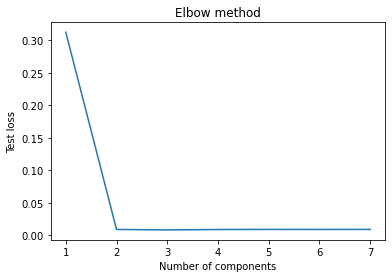

In [5]:
n_comps = np.arange(1, 8)
losses = []
for n in n_comps:
    loss = 0
    for _ in range(3):
        model = neuralnetwork.NeuralNetwork(n_comps=n, n_params=NUM_PARAMS)
        neuralnetwork.train_NN(model, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64, print_results=False)
    loss += neuralnetwork.mean_loss(X_test, y_test, model, loss=neuralnetwork.loss_hellinger).detach().item()
    losses.append(loss/3)
    print(f'Computed loss with {n} components - average loss = {loss/3}.')
plt.plot(n_comps, losses)
plt.xlabel('Number of components')
plt.ylabel('Test loss')
plt.title('Elbow method')
plt.show()

In [5]:
N_COMPS = 4

## Training models

We train 3 different models to compare their accuracy.

In [6]:
model1 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)
model2 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)

Neural Network created.
Neural Network created.
Neural Network created.


In [7]:
train_losses1, valid_losses1 = neuralnetwork.train_NN(model1, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)
train_losses2, valid_losses2 = neuralnetwork.train_NN(model2, train_data2, valid_data2, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)

Training ...: 100%|█████████▉| 499/500 [02:22<00:00,  3.49it/s]


Learning rate: 0.0025,
Train loss: 0.0032625840976834297,
 Valid loss: 0.003364620730280876


Training ...: 100%|█████████▉| 499/500 [02:28<00:00,  3.35it/s]


Learning rate: 0.005,
Train loss: 0.004463451914489269,
 Valid loss: 0.004555116407573223


Training ...: 100%|█████████▉| 499/500 [02:29<00:00,  3.34it/s]

Learning rate: 0.005,
Train loss: 0.004328414797782898,
 Valid loss: 0.004393039271235466


In [8]:
# Compute losses

print("Training dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_train3, y_train3, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_train3, y_train3, model3, loss=neuralnetwork.loss_hellinger)}')

print("\nValidation dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_valid3, y_valid3, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_valid3, y_valid3, model3, loss=neuralnetwork.loss_hellinger)}')

print("\nTest dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_hellinger)}')


Training dataset
KLD : 0.004328414797782898
Hellinger : 0.03162934631109238

Validation dataset
KLD : 0.004393039271235466
Hellinger : 0.03188975900411606

Test dataset
KLD : 0.00433266581967473
Hellinger : 0.031657762825489044


## Distributions plot

To compare predicted distributions to the theoretical ones. Given an initial condition of 0 $S$, the population of $S$ at any later time is a random integer sampled from a Poisson distribution :

$$f(x, t, c) = \frac{(ct)^xe^{-ct}}{x!}$$

In [12]:
def birth_distribution(x, t, c):
    return poisson.pmf(x, t*c)

In [61]:
def plot_model(to_pred, 
            models, 
            up_bound=500,
            n_comps=N_COMPS, 
            index_names = ['Probabilities', 'Abundance of species S'], 
            plot_test_result=(False, None), 
            plot_exact_result=True, 
            confidence_interval=False,
            plot = ('distribution', None),
            distribution=birth_distribution,
            save = (False, None)):
    # prediction
    x = torch.arange(up_bound).repeat(1, n_comps,1).permute([2,0,1])
    preds = []
    for i, model in enumerate(models):
        if plot[0] == 'distribution':
            y_pred = neuralnetwork.mix_nbpdf(model, to_pred, x)
        elif plot[0] == 'sensitivities':
            y_pred = get_sensitivities.sensitivities(to_pred, model, length_output=up_bound)[:, plot[1]+1]
        y_pred = y_pred.detach().numpy()
        pred = pd.DataFrame([np.squeeze(y_pred), np.arange(up_bound)], index = index_names).transpose()
        pred['model'] = f'training{i+1}'
        preds.append(pred)
    if plot_test_result[0]:
        result = plot_test_result[1]
        test_result = pd.DataFrame([np.squeeze(result.detach().numpy()), np.arange(up_bound)], index = index_names).transpose()
        test_result['model'] = 'SSA simulation'
        preds.append(test_result)
    if plot_exact_result:
        exact_result = pd.DataFrame([[distribution(k, to_pred[0].numpy(), to_pred[1].numpy()) for k in range(up_bound)], 
                                    np.arange(up_bound)], index = index_names).transpose()
        exact_result['model'] = 'exact distribution'
        preds.append(exact_result)
    data = pd.concat(preds, ignore_index=True)
    t = round(np.float64(to_pred[0]),2)
    c = round(np.float64(to_pred[1]),2)
    if confidence_interval:
        seaborn.relplot(data=data, x=index_names[1], y=index_names[0], aspect=1.5, kind='line').set(title=fr'{plot[0]} plot for  $ø \rightarrow S$ with $t=${t}, $c=${c}')
    else:
        seaborn.relplot(data=data, x=index_names[1], y=index_names[0], hue='model', style='model', aspect=1.5, kind='line').set(title=fr'{plot[0]} plot for  $ø \rightarrow S$ with $t=${t}, $c=${c}')
    if save[0]:
        plt.savefig(save[1])

In [62]:
def multiple_plots(preds,
            models,
            up_bound,
            n_comps=N_COMPS,
            index_names = ['Probabilities', 'Abundance of species S'],
            plot_test_result=(False, None),
            plot_exact_result=True,
            confidence_interval=False,
            plot = ('distribution', None),
            distribution=birth_distribution,
            n_col = 2,
            save = (False, None)):
    n = len(preds)
    if n == 1:
            plot_model(preds[0], models, n_comps, up_bound, index_names, plot_test_result, plot_exact_result, confidence_interval, plot, distribution)
    else:
        fig, axes = plt.subplots(math.ceil(n/n_col), n_col, figsize=(12,12))
        for k, to_pred in enumerate(preds):
            x = torch.arange(up_bound[k]).repeat(1, n_comps,1).permute([2,0,1])
            preds = []
            for i, model in enumerate(models):
                if plot[0] == 'distribution':
                    y_pred = neuralnetwork.mix_nbpdf(model, to_pred, x)
                elif plot[0] == 'sensitivities':
                    y_pred = get_sensitivities.sensitivities(to_pred, model, length_output=up_bound[k])[:, plot[1]+1]
                y_pred = y_pred.detach().numpy()
                pred = pd.DataFrame([np.squeeze(y_pred), np.arange(up_bound[k])], index = index_names).transpose()
                pred['model'] = f'training{i+1}'
                preds.append(pred)
            if plot_test_result[0]:
                result = plot_test_result[1][k]
                test_result = pd.DataFrame([np.squeeze(result.detach().numpy()), np.arange(up_bound[k])], index = index_names).transpose()
                test_result['model'] = 'SSA simulation'
                preds.append(test_result)
            if plot_exact_result:
                exact_result = pd.DataFrame([[distribution(k, to_pred[0].numpy(), to_pred[1].numpy()) for k in range(up_bound[k])], 
                                            np.arange(up_bound[k])], index = index_names).transpose()
                exact_result['model'] = 'exact distribution'
                preds.append(exact_result)
            data = pd.concat(preds, ignore_index=True)
            t = round(np.float64(to_pred[0]),2)
            c = round(np.float64(to_pred[1]),2)
            if confidence_interval:
                seaborn.lineplot(ax=axes[k//n_col, k%n_col], data=data, x=index_names[1], y=index_names[0])
            else:
                seaborn.lineplot(ax=axes[k//n_col, k%n_col], data=data, x=index_names[1], y=index_names[0], hue='model', style='model')
            axes[k//n_col, k%n_col].set_title(fr'$t={t}$, $c={c}$')
        plt.subplots_adjust(hspace=0.01)
        fig.suptitle(fr'{plot[0]} plot for $ø \rightarrow S$')
        if save[0]:
            plt.savefig(save[1])

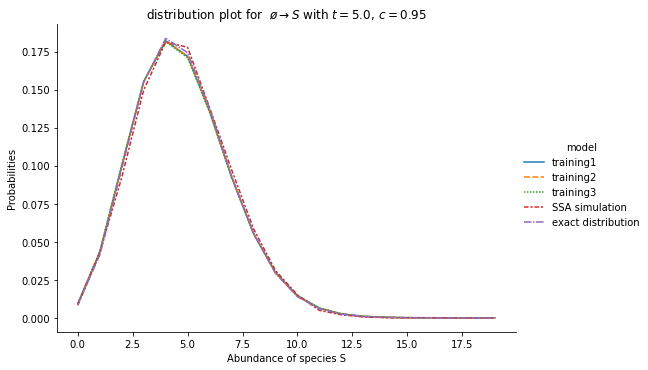

In [63]:
index = 100
plot_model(X_test[index,:], [model1, model2, model3], up_bound = 20, plot_test_result=(True, y_test[index, :]))

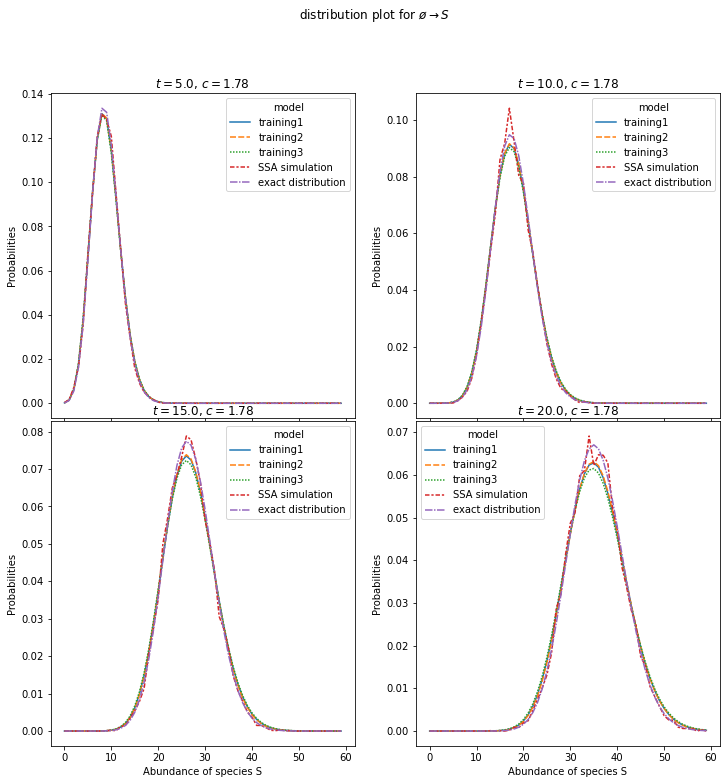

In [64]:
# middle value of the test dataset, save=(True, "4distributions.png")
multiple_plots([X_test[992+k,:] for k in range(4)], [model1, model2, model3], up_bound = 4*[60], plot_test_result = (True, [y_test[992+k,:] for k in range(4)]), save=(True, "4distributions.png"))

We can check the accuracy for higher times than those of the training :

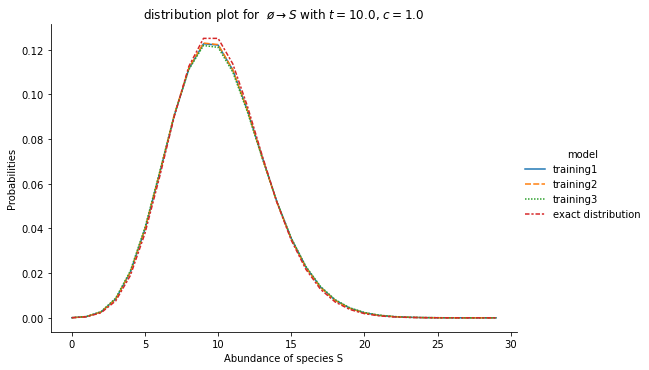

In [66]:
plot_model(torch.tensor([10., 1.]), [model1, model2, model3], up_bound = 30, save=(True, "t10c1.png"))

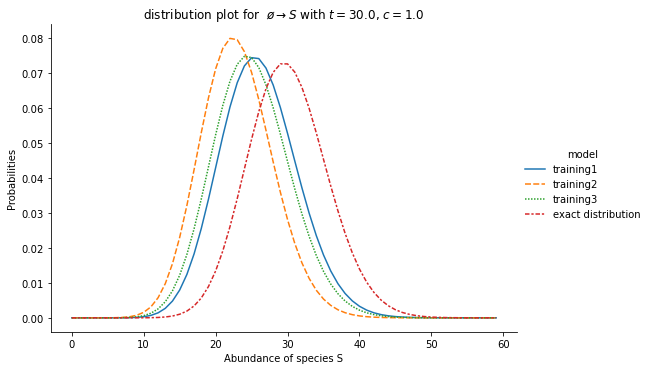

In [67]:
plot_model(torch.tensor([30., 1.]), [model1, model2, model3], up_bound = 60, save=(True, "t30c1.png"))

We can also check the accuracy for parameters outside the bounds of the training.

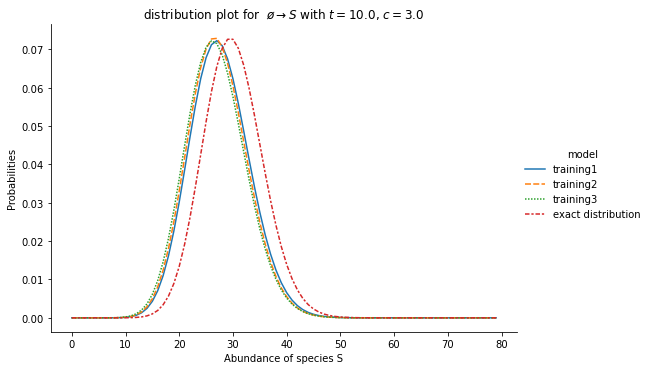

In [68]:
plot_model(torch.tensor([10., 3.]), [model1, model2, model3], up_bound = 80, save=(True, 't10c3.png'))

## Sentivities plot

To compute sensitivites and compare them to the theoretical ones. 

$$\nabla_{c} f(x, t, c) = \frac{t^xc^{x-1}e^{-ct}(x-tc)}{x!}

In [36]:
def birth_sensitivity(x, t, c):
    return t * (poisson.pmf(x-1, c*t) - poisson.pmf(x, c*t))

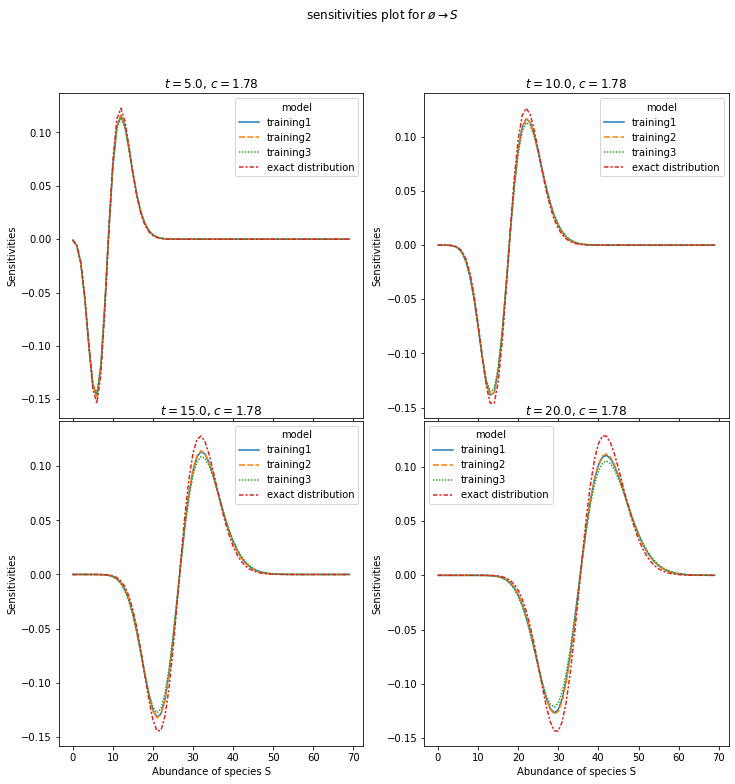

In [69]:
multiple_plots([X_test[992+k,:] for k in range(4)], [model1, model2, model3], up_bound=[70]*4, plot=('sensitivities', 0), distribution=birth_sensitivity, index_names = ['Sensitivities', 'Abundance of species S'], save=(True, "sensitivities_median.png"))

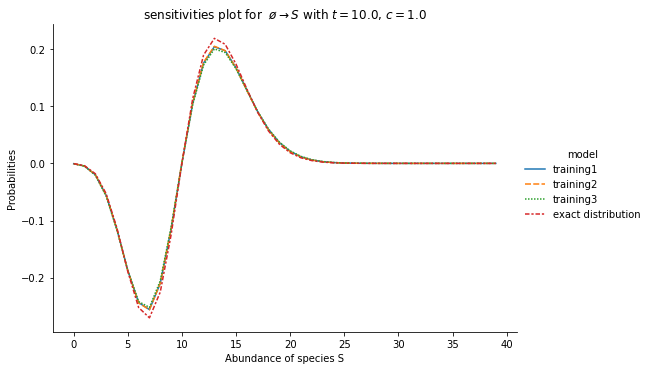

In [70]:
plot_model(torch.tensor([10., 1.]), [model1, model2, model3], up_bound=40, plot=('sensitivities', 0), distribution=birth_sensitivity, save=(True, 'sensitivites_t10c1.png'))

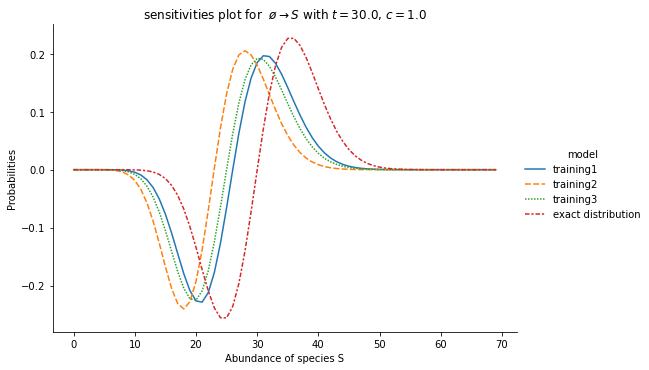

In [71]:
plot_model(torch.tensor([30., 1.]), [model1, model2, model3], up_bound=70, plot=('sensitivities', 0), distribution=birth_sensitivity, save=(True, "sensitivities_t30c1.png"))

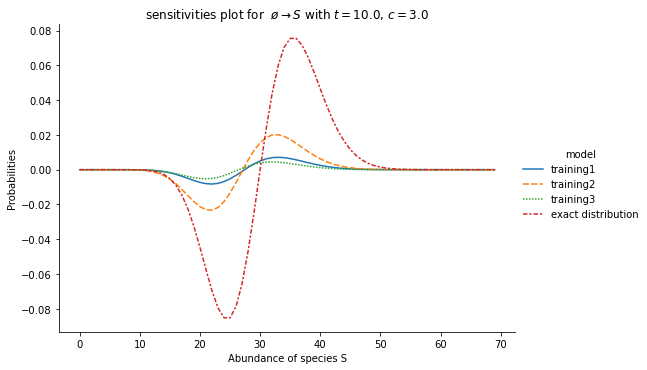

In [72]:
plot_model(torch.tensor([10., 3.]), [model1, model2, model3], up_bound=70, plot=('sensitivities', 0), distribution=birth_sensitivity, save=(True, "sensitivities_t10c3.png"))

## Fisher information

In [9]:
def exact_fim(t, params, up_bound=500):
    res = 0
    c = params[0]
    for k in range(up_bound):
        res += (k/c - t)**2*birth_distribution(k, t, c)
    return res

In [10]:
def fi_table_multiple(time_samples, 
            params, 
            ind_param, 
            models = (False, None, 3),
            exact: Tuple[bool, Callable] =(False, None), 
            fsp = (False, np.zeros(1), [], 10, None),
            up_bound = 100):
    rows = [fr'$t={t}$' for t in time_samples]
    n_rows = len(time_samples)
    # compute probabilities and sensitivities with the neural networks
    if models[0]:
        probabilities_m = np.zeros((len(time_samples),up_bound))
        stv_m = np.zeros((len(time_samples),up_bound, len(params)))
        x = torch.arange(up_bound).repeat(1, models[2],1).permute([2,0,1])
        for model in models[1]:
            for i, t in enumerate(time_samples):
                to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))
                sens, probs = get_sensitivities.sensitivities(to_pred, model, length_output=up_bound, with_probs=True)
                probabilities_m[i,:] += probs[:,0].numpy()
                stv_m[i,:,:] += sens[:,1:].numpy()
        probabilities_m /= len(models[1])
        stv_m /= len(models[1])
        # compute FIM
        predicted_fi = np.zeros(n_rows)
        for i in range(n_rows):
            fim_m = ode.fisher_information_t(probabilities_m[i,:], stv_m[i,:,:])
            predicted_fi[i] = fim_m[ind_param, ind_param]
    # compute probabilities and sensitivities with the FSP
    if fsp[0]:
        crn = simulation.CRN(fsp[1], fsp[2], len(params))
        stv_calculator = ode.SensitivitiesDerivation(crn, fsp[3])
        n_cr = int(fsp[3]*(fsp[3]+3)/2+1)
        if fsp[4]:
            init_state = fsp[4]
        else:
            init_state = np.zeros(2*n_cr)
            init_state[1] = 1
            init_state = np.stack([init_state]*crn.n_reactions)
        probs_fsp, stv_fsp = stv_calculator.get_sensitivities(init_state, 0, time_samples[-1], params.numpy(), t_eval=time_samples)
        fsp_fi = np.zeros(n_rows)
        for i in range(n_rows):
            fim = ode.fisher_information_t(probs_fsp[i,:], stv_fsp[i,:,:])
            fsp_fi[i] = fim[ind_param, ind_param]
    # add condition for models and fsp
    columns = []
    data = []
    # gathering data
    if models[0]:
        columns.append('Predicted with NN')
        data.append(np.round(predicted_fi,3))
    if fsp[0]:
        columns.append('Estimated with FSP')
        data.append(np.round(fsp_fi, 3))
    if exact[0]:
        columns.append('Exact')
        exact_fi = np.zeros(n_rows)
        for i, t in enumerate(time_samples):
            exact_fi[i] = exact[1](t, params.numpy())
        data.append(np.round(exact_fi,3))
    if len(data)==1:
        data = np.array(data).T
    else:
        data = np.stack(data, axis=-1)
    #plot
    fig, ax = plt.subplots(figsize=(8,3))
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    table = plt.table(cellText=data, colLabels=columns, rowLabels=rows, loc='center', cellLoc='center', colWidths=[1.]*len(columns))
    table.set_fontsize(14)
    table.scale(0.4,1.6)
    plt.subplots_adjust(left=0.2, bottom=0.2)
    fig.suptitle(f'Fisher Information - parameter n°{ind_param} - parameter values {params}')
    plt.show()

/var/folders/tq/795v7745669dnb2z48kn2vzw0000gn/T/ipykernel_45573/1035999845.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))


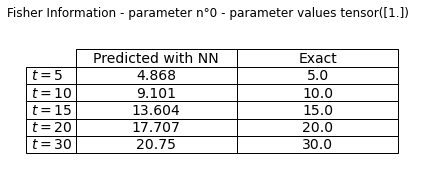

In [13]:
fi_table_multiple([5, 10, 15, 20, 30], torch.tensor([1.]), ind_param=0, models = (True, [model1, model2, model3], N_COMPS), exact=(True, exact_fim))

/var/folders/tq/795v7745669dnb2z48kn2vzw0000gn/T/ipykernel_45573/1035999845.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))


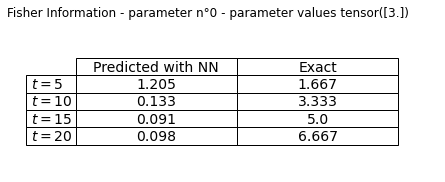

In [17]:
fi_table_multiple([5, 10, 15, 20], torch.tensor([3.]), ind_param=0, models = (True, [model1, model2, model3], N_COMPS), exact=(True, exact_fim))